# GIS GZ – Übung 12: Visualisierung

### Grobziele
* Sie können unterschiedliche Techniken anwenden und begründen, um eine Karte möglichst ansprechend zu gestalten. 

### Feinziele
* Sie können Darstellungregeln auf Ihre Karten anwenden. 
* Sie können begründen, welche Diagrammart am besten zu einem Datensatz oder zu einem Problem passt. 
* Sie können unterschiedliche Diagrammtypen mit Matplotlib darstellen und in Karten einbetten. 
* Sie können zeitliche Daten mit Matplotlib visualisieren.

### Projekt
* Sie arbeiten an Ihrem Projekt und fokussieren auf die Visualisierung der Daten und der Ergebnisse. 

## Einleitung
In der heutigen Übung betrachten wir erneut (siehe Übung 9) die Bevölkerungsentwicklung (Männer + Frauen || Schweizer + Ausländer) in den Gemeinden des Kantons Zürich. Dazu verwenden wir einen Datensatz, der die totalen Bevölkerungszahlen von 1981 bis und mit 2018 angibt. Wir gehen von den heutigen Gemeinden aus (also nach allen Gemeindefusionen) und möchten die Änderung der absoluten Anzahl an Personen über die Zeit darstellen (im Vergleich dazu befasste sich die Übung 9 mit der Visualisierung von Bevölkerungsdichten). Eine Möglichkeit bietet sich durch den Einsatz von Diagrammen an, um die Änderung der absoluten Anzahl an Personen pro Gemeinde darzustellen. 


## Vorgehen
* Ergänzen Sie die beiden Funktionen `plot_pies` und `plot_bars`, um ein Diagramm in jeder Gemeinde zu platzieren.
* Passen Sie die Ausgabe nach Ihren Vorstellungen unter Einhaltung der besprochenen Designrichtlinien an.

## Dateien
In dieser Aufgabe erhalten Sie drei Dateien:
* `gemeinden_zh_191114c.json` die Geodaten mit den Gemeinden des Kantons Zürich. Der Datensatz ist gegenüber dem Datensatz der Übung 9 insofern verbessert, als dass die grösseren drei Seen ausgeschnitten sind.
* `bfs_totale_bevoelkerung_kanton_zuerich_1981_2018.csv` die totale Bevölkerungsanzahl pro Gemeinde anhand der BFS-Nummer des Jahrs 2018 (ohne Unterscheidung zwischen Männern und Frauen bzw. Schweizern und Ausländern).
* `seen_zh_191114c.json` die grösseren Seen des Kantons Zürich.


## Besonderes
* Achtung mit den Encodings beim Importieren von Datensätzen!
* Achten Sie darauf, dass zwei Gemeinden aus zwei Polygonen bestehen ("Hauptgemeinde" + Exklave). Finden Sie irgendeinen Trick, um dieses Problem zu lösen. 

# Hilfsfunktion, um horizontale Position der Säulen im Säulendiagramm zu berechnen

In [1]:
def calculate_bar_x_positions(centroid, values_list):
    # Calculate the number of bars that should be displayed
    number_of_bars = len(values_list)
    
    # Define the maximum x distance from the outer bar to the centroid and the gap width relative to the bar width
    max_distance = 800  # same dimension as projected CRS
    relative_gap_width = 0.2
    
    # Compute the gap and the bar width
    total_number_of_bars = number_of_bars + relative_gap_width * (number_of_bars - 1)
    bar_width = 2 * max_distance / (total_number_of_bars - 1)
    # -1 because the center of the bars lies on the outer points and each has an extension of half a bar
    gap_width = relative_gap_width * bar_width
    
    # Determine the start position on the left outer point
    start_position_x = centroid.x - max_distance
    
    # Compute a list with all x positions
    x_positions = []
    for i in range(number_of_bars):
        x_position = start_position_x + i * (bar_width + gap_width)
        x_positions.append(x_position)
        
    return x_positions

# Aufgabe 1
Ergänzen Sie die Funktion zum Zeichnen von Kuchendiagrammen, verwenden Sie dafür die Funktion
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.pie.html#matplotlib.axes.Axes.pie (Die Parameter für `radius`, `center` und `colors` haben wir bereits für Sie berechnet.)

Vergleichen Sie die Jahre 1981, 2000, 2018 in dem gezeichneten Diagramm.

In [2]:
def plot_pies(df, ax):
    scaling_factor = 50
    
    # Iterate through the rows
    for num, row in enumerate(df.itertuples()):
        
        # Determine the cell centroid
        centroid = row.centroid

        # TODO: This list should include just the values from 1981, 2000, and 2018
        num_2018 = row.Totaler_Bestand_2018
        values = []
        
        # Create colors for each value
        cmap = plt.cm.copper
        colors = cmap(np.linspace(0., 1., len(values)))

        # Plot pie charts
        radius = math.pow(num_2018, 1/3) * scaling_factor
        
        # TODO: call ax.pie(...)


# Aufgabe 2
Ergänzen Sie die Funktion zum Zeichnen von Säulenendiagrammen und verwenden Sie dafür die Funktion
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.bar.html#matplotlib.axes.Axes.bar

Verwenden Sie `values_bar_chart` für den Parameter `height`. Verwenden Sie die Hilfsfunktion `calculate_bar_x_positions(centroid, values_list)` um den Parameter `x` zu bestimmen.

Vergleichen Sie die Jahre 1981, 2000, 2018 in dem gezeichneten Diagramm.

In [3]:
def plot_bars(df, ax):
    scaling_factor = 10
    
    # Iterate through the rows
    for num, row in enumerate(df.itertuples()):
        
        values = []
      
        # Plot bar charts
        values_bar_chart = [math.pow(value, 1/3) * scaling_factor for value in values]
        
        # TODO: call ax.bar(...)

# Datenverarbeitung

In [4]:
%matplotlib inline
import os
import math
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
#from data.requirements import show_result


# Define important paths
table = os.path.join('data', 'bfs_totale_bevoelkerung_kanton_zuerich_1981_2018.csv')
shapes = os.path.join('data', 'gemeinden_zh_191114c.json')
lakes = os.path.join('data', 'seen_zh_191114c.json')

# Read the data into Pandas and GeoPandas
geometries = gpd.read_file(shapes)
lakes_data = gpd.read_file(lakes)
table_data = pd.read_table(table, encoding='latin-1', delimiter=';')

# Join the columns of the DataFrame to the GeoDataFrame and extract the centroid to a new column
df = geometries.merge(table_data, on='BFS_NUMMER')
df['centroid'] = df.geometry.centroid

# Drop all polygons with GEM_TEIL == 2
double_entries = df.loc[df.GEM_TEIL == '2'].index
df.drop(double_entries, inplace=True)

# Basiskarte zeichnen

In [5]:
def plot_base():
    # Plot the base map
    fig, ax = plt.subplots(figsize=(50, 50))
    ax.set_aspect('equal')
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    ax.xaxis.set_major_formatter(matplotlib.ticker.OldScalarFormatter())
    ax.yaxis.set_major_formatter(matplotlib.ticker.OldScalarFormatter())
    ax.tick_params(axis='x')

    df.plot(ax=ax, color='white', edgecolor='black')
    
    # Plot lakes
    lakes_data.plot(ax=ax, color='lightblue', edgecolor='lightblue')
    
    return ax

# Kuchendiagramme zeichnen

Text(0.5, 1.0, 'Gemeinden des Kantons Zürich im Jahre 2019')

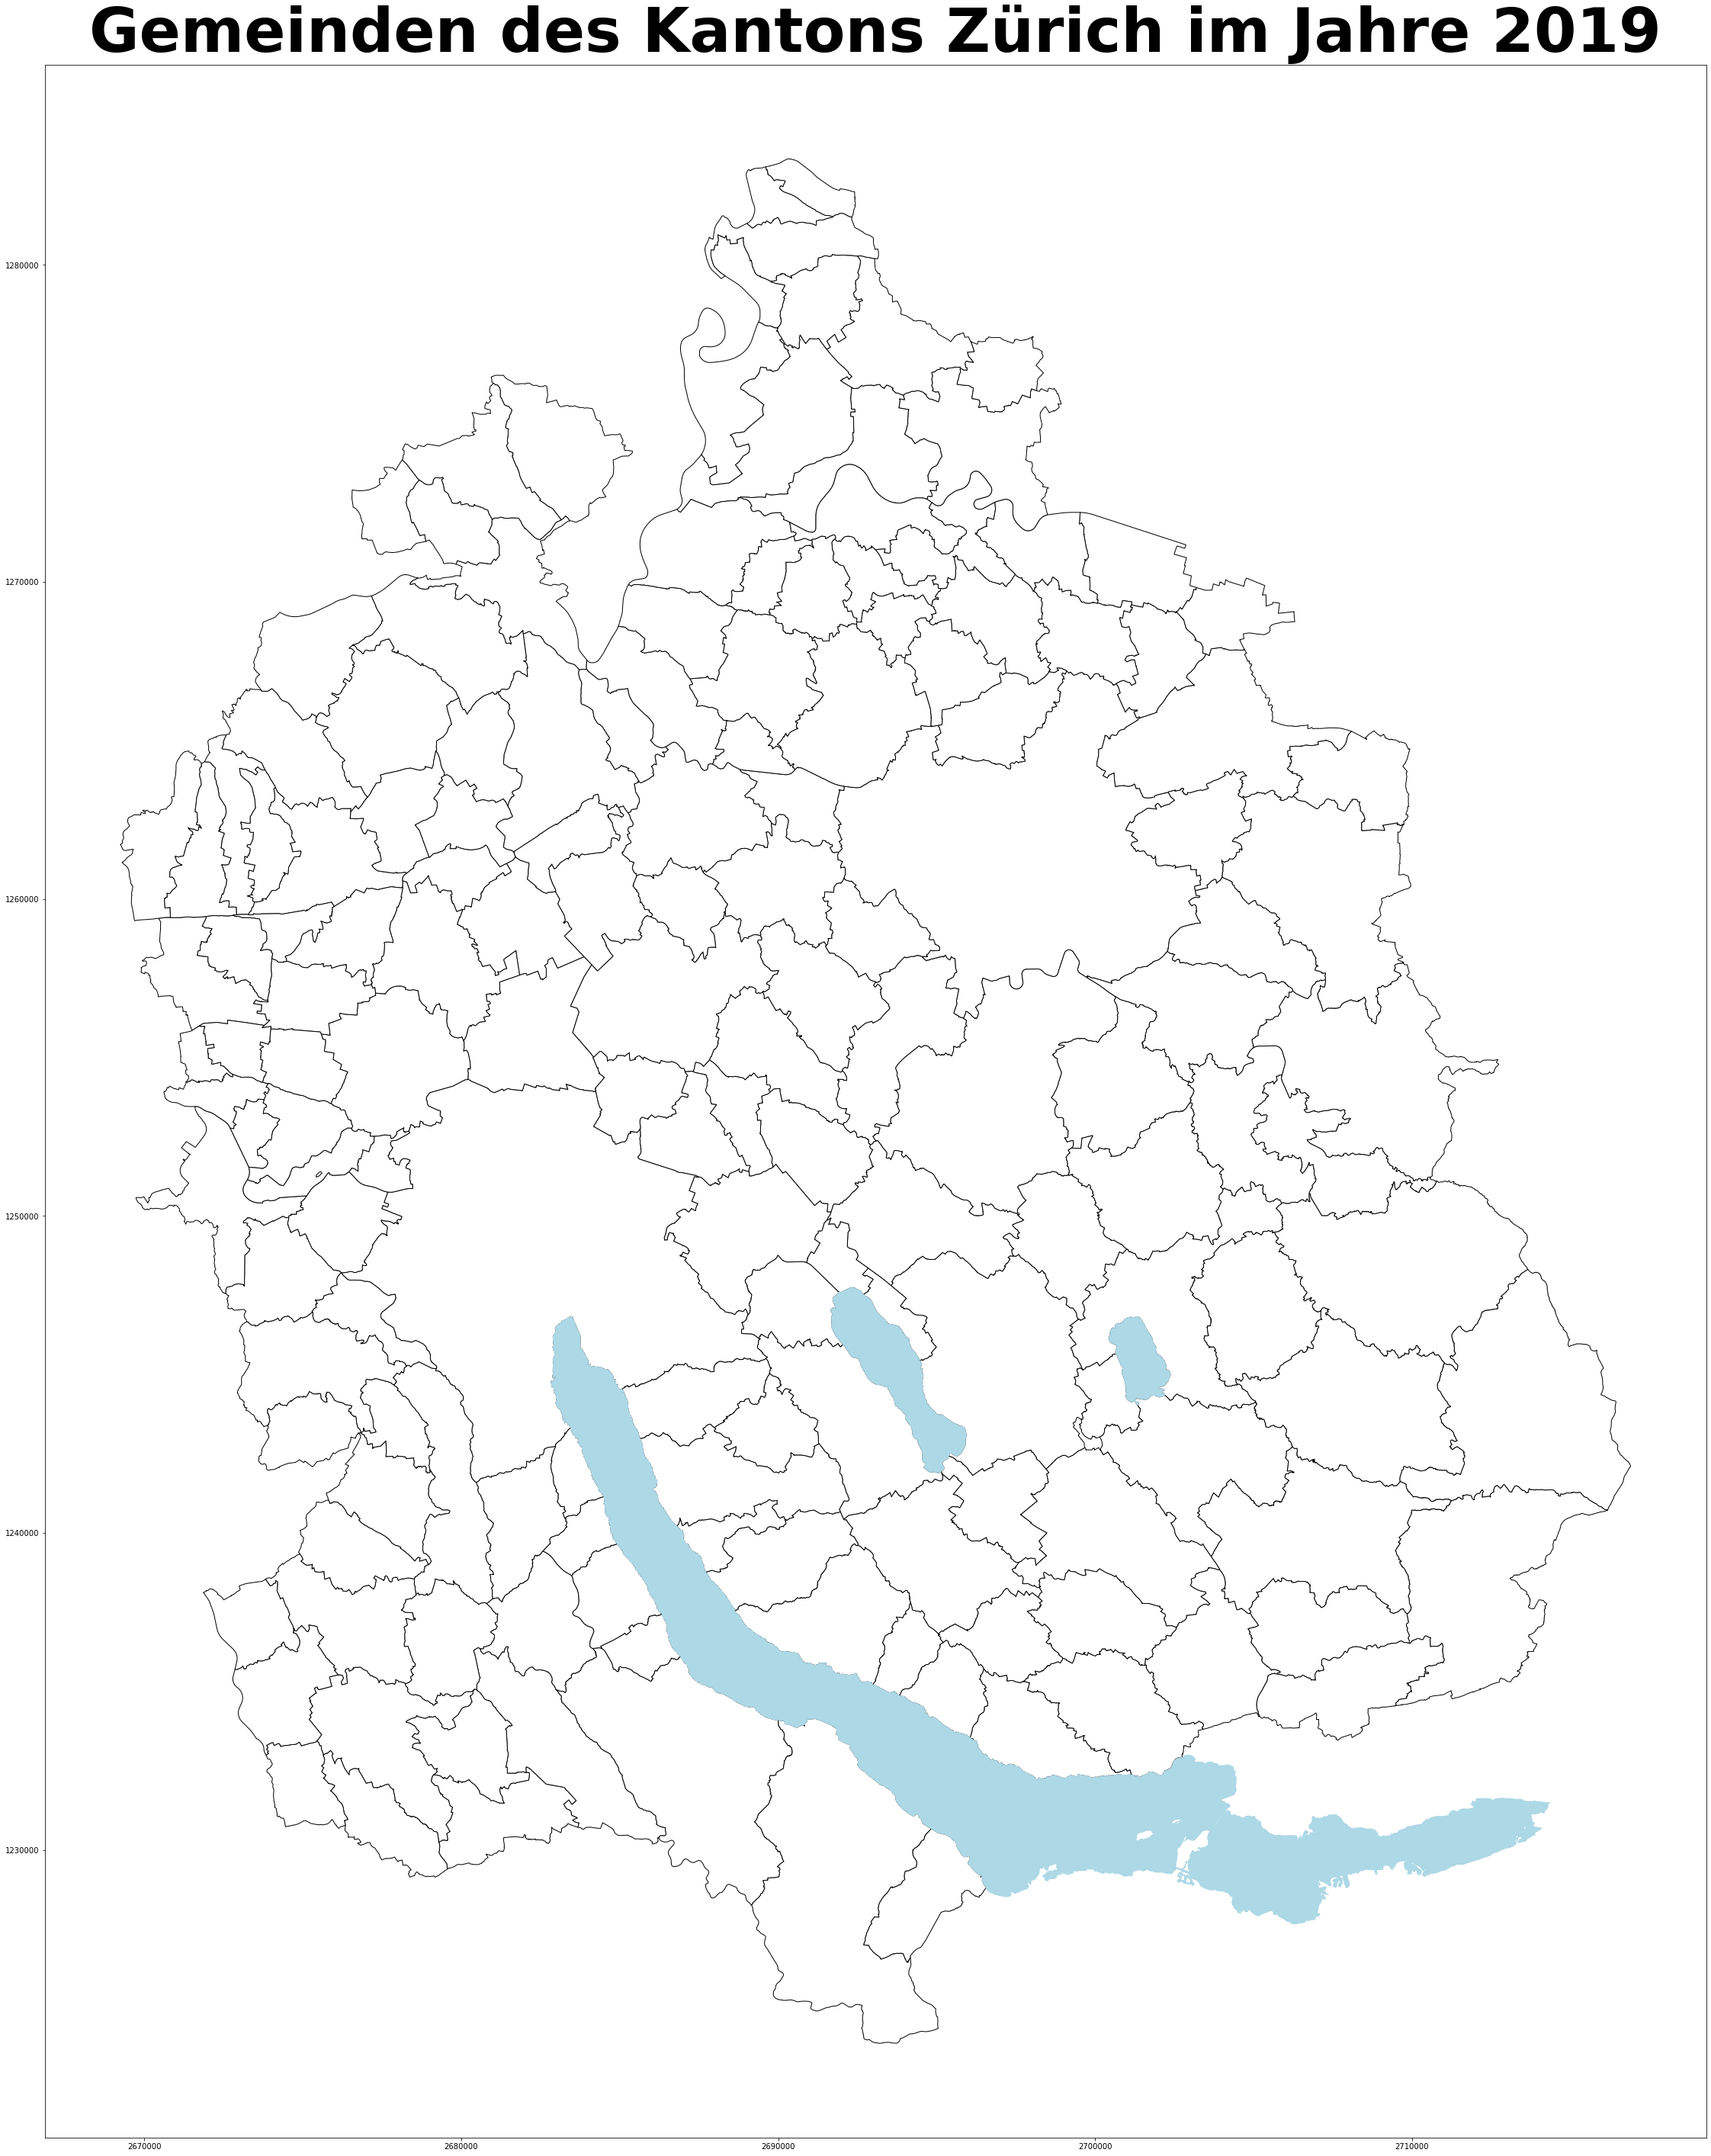

In [6]:
ax = plot_base()
plot_pies(df,ax)
ax.set_title(label='Gemeinden des Kantons Zürich im Jahre 2019',
             fontdict={'fontsize': 80,
                       'fontweight' : 'semibold',
                       'verticalalignment': 'baseline',
                       'horizontalalignment': 'center'})

# Säulendiagramme zeichnen

Text(0.5, 1.0, 'Gemeinden des Kantons Zürich im Jahre 2019')

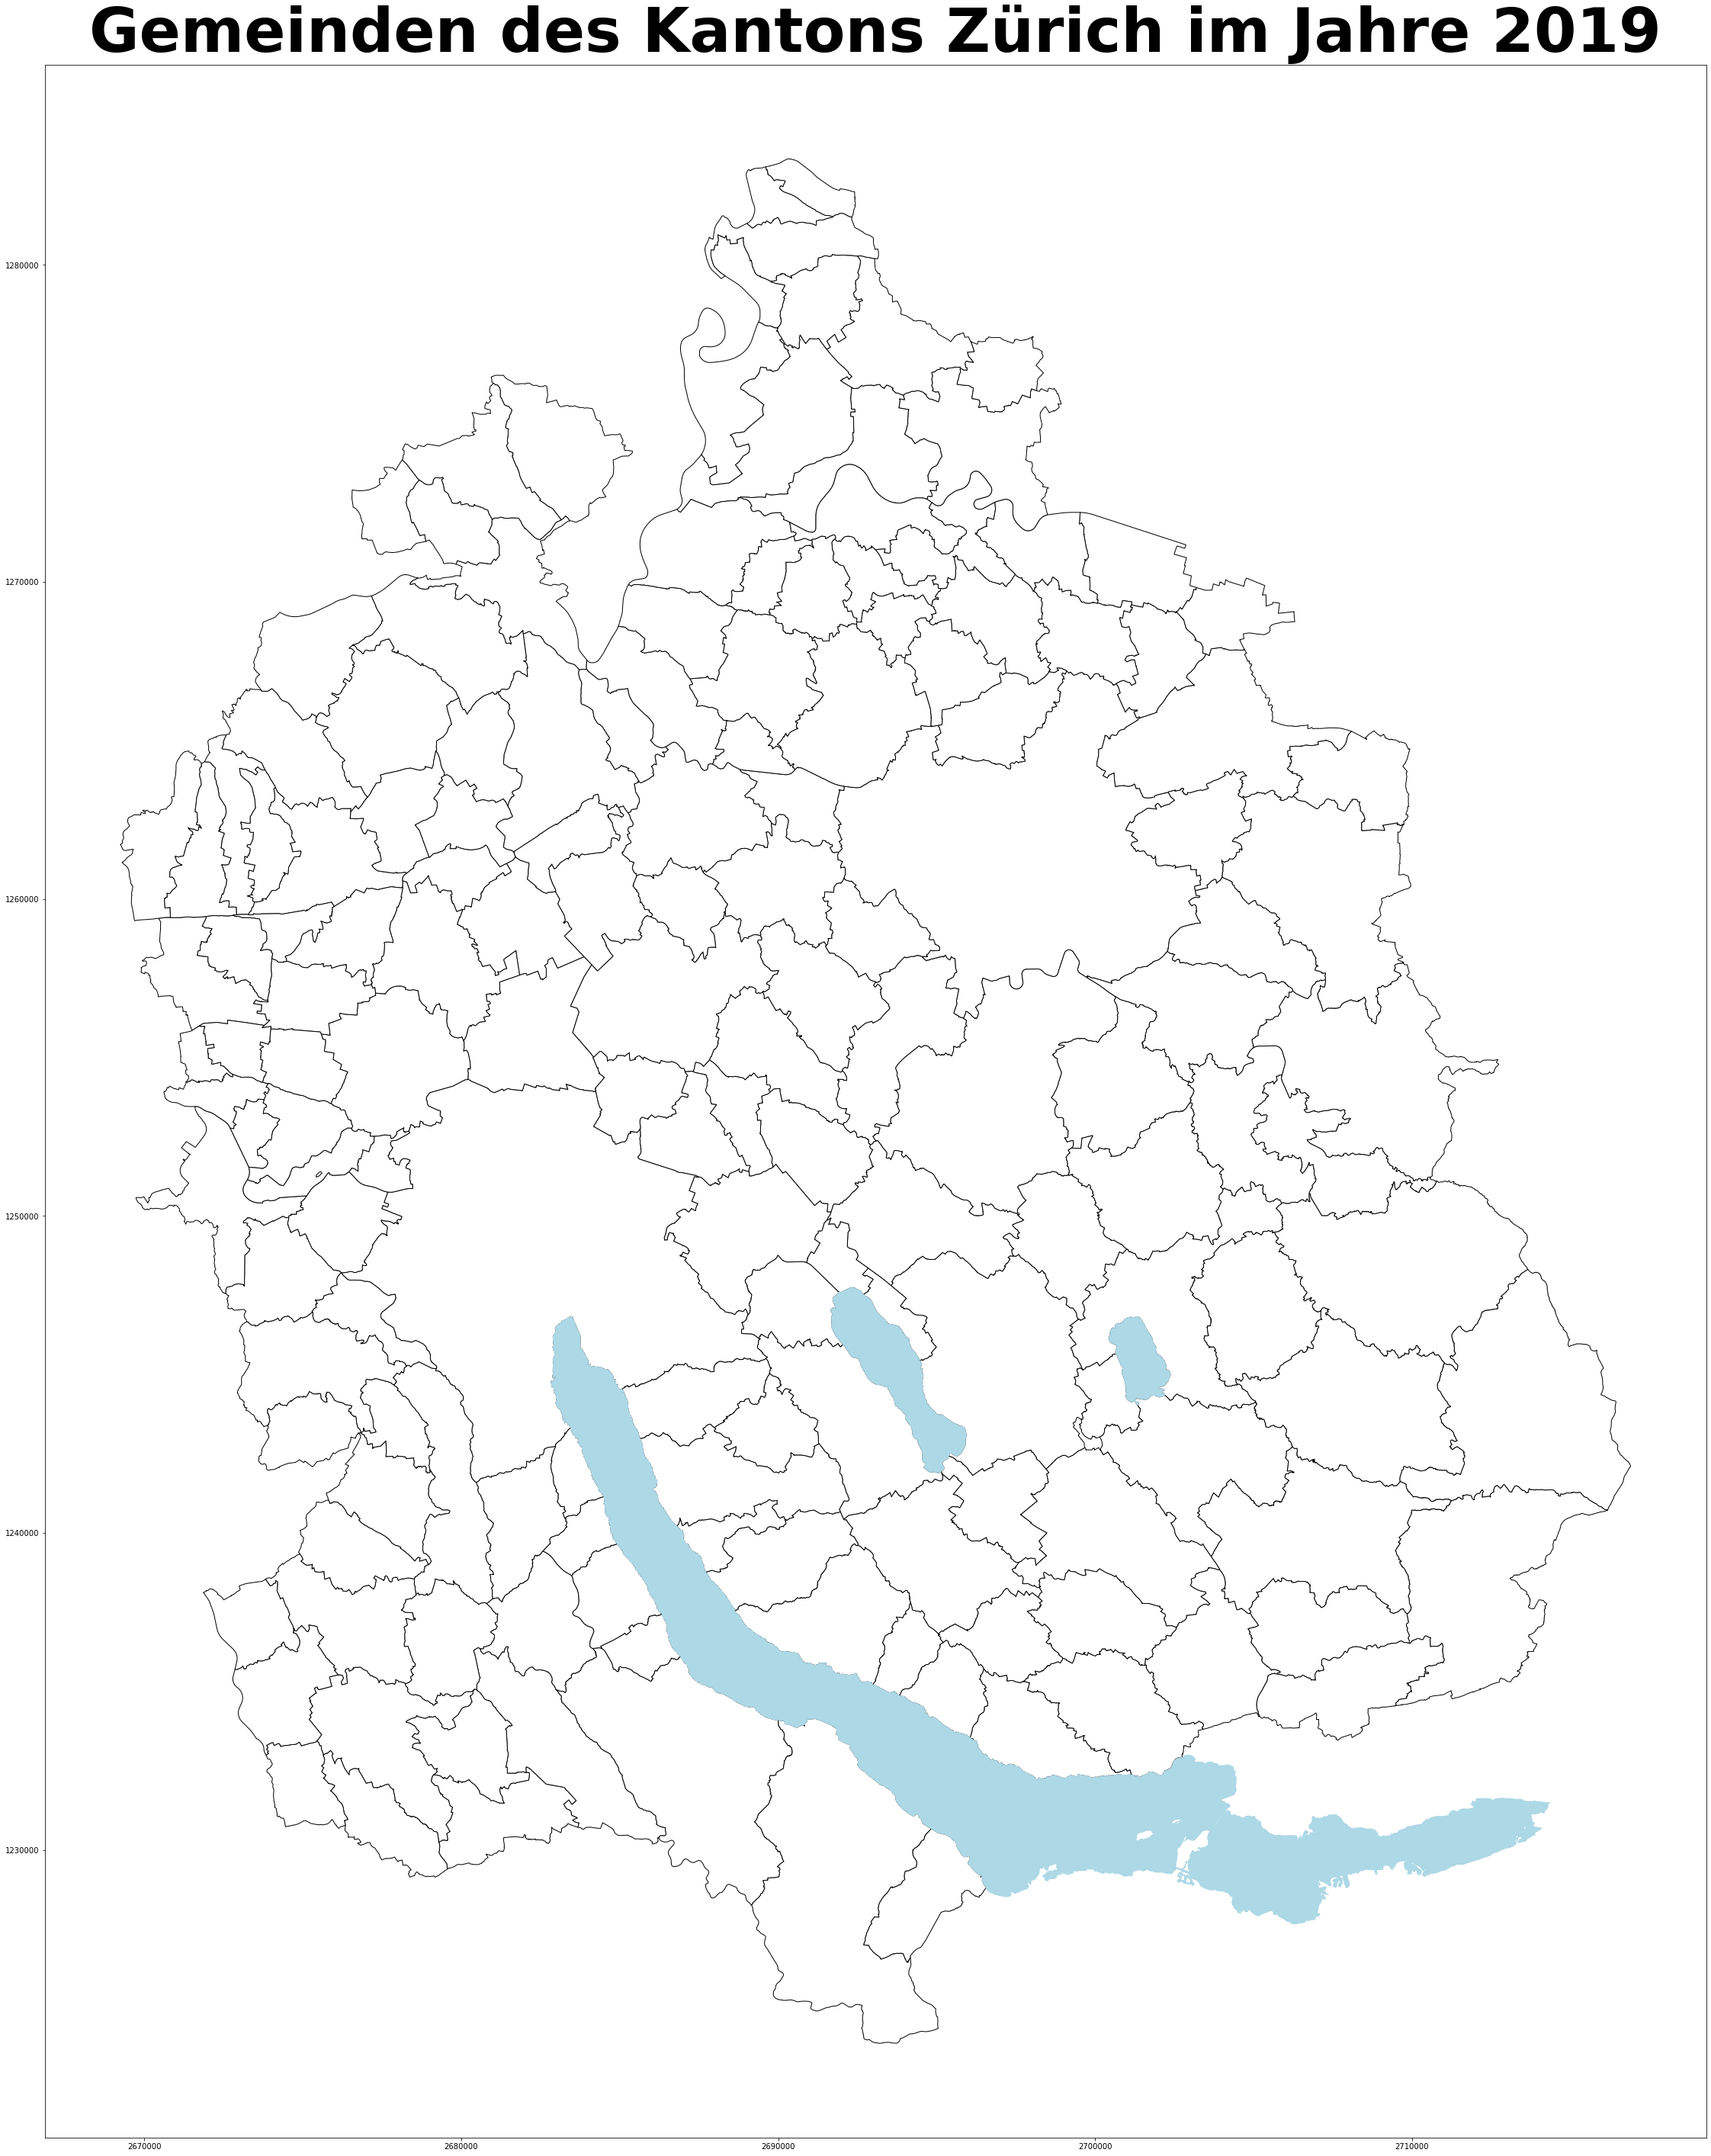

In [7]:
ax = plot_base()
plot_bars(df,ax)
ax.set_title(label='Gemeinden des Kantons Zürich im Jahre 2019',
             fontdict={'fontsize': 80,
                       'fontweight' : 'semibold',
                       'verticalalignment': 'baseline',
                       'horizontalalignment': 'center'})

# Aufgabe 3
Ergänzen Sie die beiden Funktionen `plot_pies` und `plot_bars` so, dass Ihnen die Bevölkerungsentwicklung von 1981 bis 2018 angezeigt wird.

## Fragen
* Wie könnte man die zeitlichen Entwicklung der Bevölkerungsanzahl in den Städten und den Agglomerationsgemeinden interpretieren?
* Welche der beiden Darstellung halten Sie für eine Untersuchung der zeitlichen Entwicklung für geeigneter?
* Haben Sie weitere Ideen, wie man die zeitliche Entwicklung besser interpretieren könnte?

## Weiterführende Aufgaben (freiwillig)
* Die obigen Diagramme wurden mit der Division durch Wurzel 3 geglättet. Diskutieren Sie Vor- und Nachteile dieser Methode und erarbeiten Sie Lösungen, wie man die Änderungen linear proportional veranschaulichen kann, ohne das Kartenlayout negativ zu beeinflussen. 
* Das Farbschema wurde in der Aufgabenstellung sequentiell gewählt. Bei bloss drei Zeitständen würde es unter Umständen mehr Sinn machen, ein qualitatives Farbschema zu wählen. Suchen Sie entweder ein passendes Farbschema oder erstellen Sie selbstständig eines, idealerweise unter Beihilfe von colorbrewer2.org. 